In [2]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [4]:
# full = []
medium = []
simple = []

for i in range(5):
    # full.append(DirThompsonSampling.load(f"data/dir_ts/None-{i}.pkl"))
    medium.append(DirThompsonSampling.load(f"data/dir_ts/Medium-{i}.pkl"))
    simple.append(DirThompsonSampling.load(f"data/dir_ts/Simple-{i}.pkl"))

In [ ]:
# dqns = [train_dqn(true_env, key, name=f"{key}") for key in list(full.policies.keys())]
# dqn_policies = [dqn.get_policy() for dqn in dqns]
# dqn_rewards = [evaluate_policy(policy, 10000) for policy in dqn_policies]


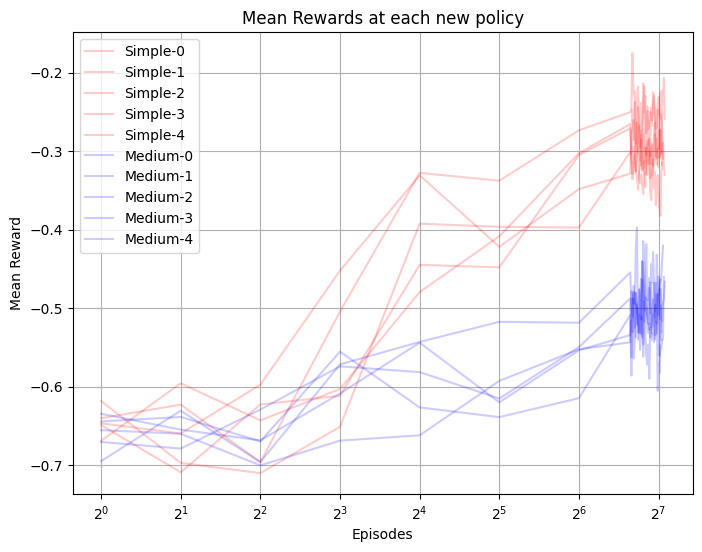

In [10]:
plt.figure(figsize=(8, 6))
models = simple
for model in models:
    plt.plot(list(model.policies.keys()), model.get_mean_rewards(10000), label=model.name, color='red', alpha=0.2)
    model.save()
models = medium
for model in models:
    plt.plot(list(model.policies.keys()), model.get_mean_rewards(10000), label=model.name, color='blue', alpha=0.2)
    model.save()
# plt.scatter(list(model.policies.keys()), model.get_mean_rewards(10000), label=model.name)
# plt.plot(list(simple.policies.keys()), dqn_rewards, label='DQN', alpha=0.2)
# Add labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards at each new policy')
plt.xscale('log', base=2)
plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()

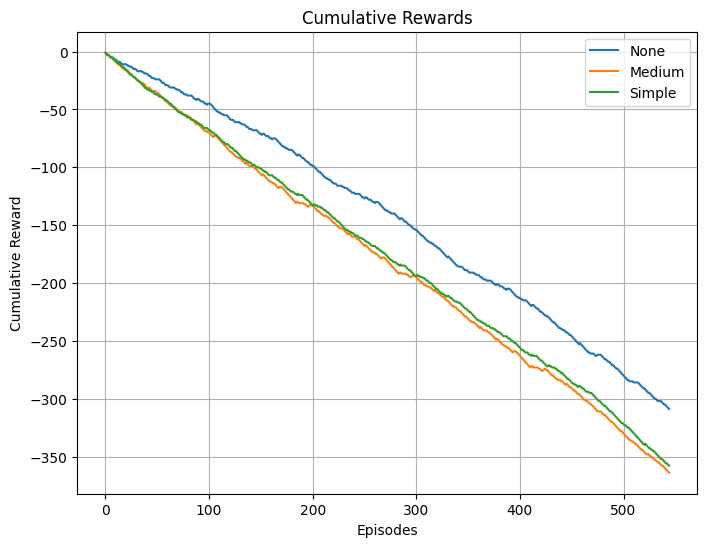

In [53]:
plt.figure(figsize=(8, 6))
for model in [full, medium, simple]:
    plt.plot(np.cumsum(model.rewards), label=model.name)
# plt.plot(list(full.policies.keys()), dqn_rewards, label='DQN', alpha=0.2)
# Add labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards')
# plt.xscale('log', base=2)
plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()